In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

## 1 - Fit data and plot with errorbars

In [2]:
df1 = pd.read_csv('Data/Data-1.dat', sep='\t')

In [3]:
df1

,x,y,dy
0,0,0.0,0.1
1,1,0.8,0.1
2,2,0.9,0.1
3,3,0.1,0.1
4,4,-0.8,0.1
5,5,-1.0,0.1


In [4]:
x = df1['x']
y = df1['y']
dy = df1['dy']

In [5]:
#function to fit
def f(x, a_0, a_1, a_2, a_3):
  return a_0 + a_1*x + a_2*x**2 +a_3*x**3

In [6]:
a, cov_a = curve_fit(f, x, y)

In [7]:
a

array([-0.03968254,  1.69312169, -0.81349206,  0.08703704])

In [8]:
sigma_a = np.sqrt(np.diagonal(cov_a))

In [9]:
xs = np.arange(0,5,0.1)

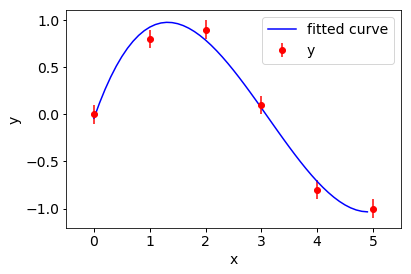

In [10]:
plt.plot(xs, f(xs,*a), label = 'fitted curve', c='b')
plt.errorbar(x, y, dy, linestyle='', marker = 'o', c='r')
plt.ylabel('y',fontsize=14)
plt.xlabel('x',fontsize=14)
plt.xlim([-0.5,5.5])
plt.tick_params(labelsize=14,width=1)
plt.legend(fontsize=14)
#plt.savefig('Fit.png')
plt.show()

## 2 - Generate normal distributed data and plot histogram

In [11]:
mean = 100
sigma = 15
Number = 10000
z = np.random.normal(mean, sigma, Number)

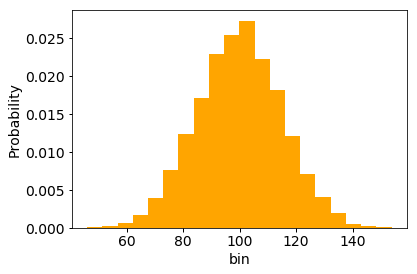

In [12]:
plt.hist(z, bins = 20,  normed = 1, color = 'orange')
plt.xlabel('bin',fontsize=14)
plt.ylabel('Probability',fontsize=14)
plt.tick_params(labelsize=14,width=1)
#plt.savefig('Histogram.png')
plt.show()

## 3 - Plot a time series at four distances

In [13]:
Pr = 15
beta2=2.6*10**(-4)
gamma=0.01
Po=10
Lo=1/(gamma*Po)
To=np.sqrt(beta2/(gamma*Po))

In [14]:
color_x = ['red','orange','green','blue']
label_x = ['500 m','400 m','300 m','200 m']

In [15]:
s=14

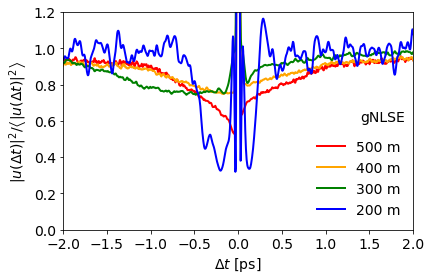

In [16]:
for j in range(0,4):
  z = 50 - j*10
  data = pd.read_csv('Data/TS_z_%d_Pr_%d.dat'%(z,Pr), sep='\t', header=None)
  t = data.iloc[:,0]*To
  a = data.iloc[:,1]
  plt.plot(t, a, label = label_x[j], linestyle="-", linewidth=2.0, marker= "", markeredgecolor= color_x[j], markersize=5, color= color_x[j])

plt.legend(numpoints=1,loc="lower right",frameon=False,fontsize=s)
plt.tick_params(labelsize=s)
plt.xlabel('$\Delta t$ [ps]',fontsize=s)
plt.ylabel('$|u(\Delta t)|^2$/$\left<|u(\Delta t)|^2\\right>$',fontsize=s)
plt.xlim([-2,2])
#plt.xticks([-2,-1,0,1,2])
plt.ylim([0,1.2])
plt.text(1.4, 0.6, 'gNLSE', fontsize=s)
plt.tight_layout()
#plt.savefig("TS.png")
plt.show()

## 4 - Plot 3D data with color map

In [17]:
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01) 

In [18]:
X, Y = np.meshgrid(x,y)
Z = np.sqrt(X**2 + Y**2)

In [19]:
s=14

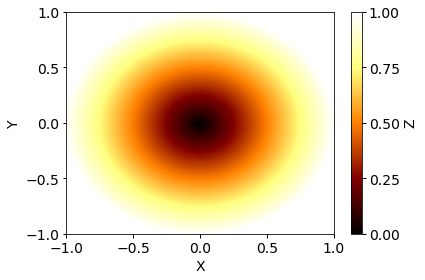

In [20]:
plt.scatter(X, Y, cmap = 'afmhot', c = Z, marker = '.', edgecolor = 'none', vmin = 0, vmax = 1)
#cmap = 'jet','afmhot_r','afmhot','cool', ...
cbar = plt.colorbar()
cbar.set_label('Z', fontsize=s)
cbar.set_ticks([0.00,0.25,0.50,0.75,1.00])
cbar.ax.tick_params(labelsize=s, width=1) 

plt.xlabel('X', fontsize=s)
plt.xlim([-1, 1])
plt.ylabel('Y', fontsize=s)
plt.ylim([-1, 1])
plt.tick_params(labelsize=s, width=1)
plt.tight_layout()
#plt.savefig('Cmap.png')
plt.show()